<a href="https://colab.research.google.com/github/sol-ops/gpt3-leukemia-information-assistant/blob/main/leukemia_detection_by_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
import tensorflow


In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/data/train'
vlid_path='/content/drive/MyDrive/data/validation'

In [ ]:
resnet50=ResNet50(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet50.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/MyDrive/data/train/*')

In [ ]:
folders

['/content/drive/MyDrive/data/train/normal',
 '/content/drive/MyDrive/data/train/leukumized']

In [ ]:
x=Flatten()(resnet50.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=resnet50.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)




In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 100 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode='categorical')

Found 10 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-80-b4b2878d2ea9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 46s 5s/step - loss: 3.2794 - accuracy: 0.5800 - val_loss: 2.3558 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 21s 3s/step - loss: 1.4353 - accuracy: 0.6200 - val_loss: 2.2425 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 22s 3s/step - loss: 1.5858 - accuracy: 0.5700 - val_loss: 0.5602 - val_accuracy: 0.6000
Epoch 4/10
7/7 [==============================] - 25s 4s/step - loss: 1.7132 - accuracy: 0.6300 - val_loss: 3.2581 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 24s 3s/step - loss: 1.2364 - accuracy: 0.6400 - val_loss: 0.8461 - val_accuracy: 0.6000
Epoch 6/10
7/7 [==============================] - 20s 3s/step - loss: 0.6594 - accuracy: 0.8000 - val_loss: 1.1298 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 21s 3s/step - loss: 0.8097 - accuracy: 0.7100 - val_loss: 0.5951 - val_accuracy: 0.7000
Epoch 8/10
7/7 [==================

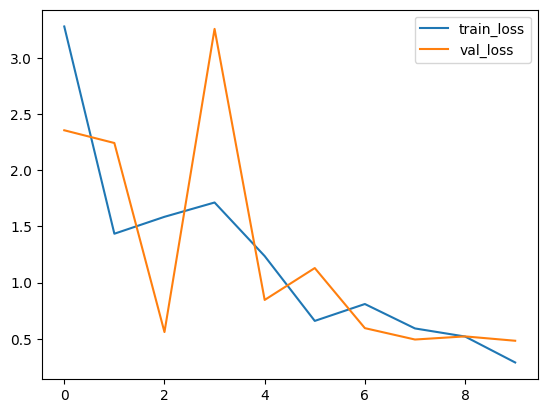

<Figure size 640x480 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


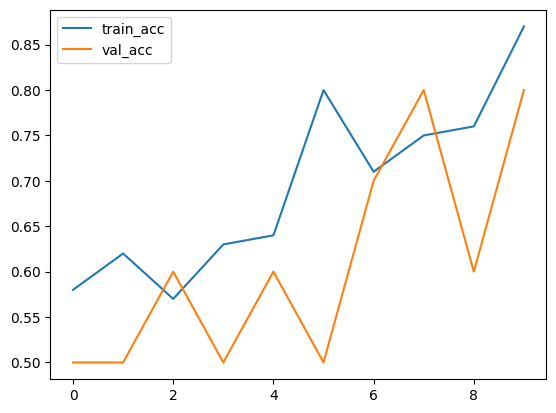

NameError: ignored

In [82]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig(AccVal_acc)